# TP3 M1 info -- Introduction au traitement du signal, aux signaux sonores et aux images -- Filtres et convolutions

**But du TP** :
* Comprendre les avantages de l'utilisation de filtres et de convolutions sur les images

**Avertissement** :
Il peut être tentant d'utiliser ChatGPT ou d'autres outils d'écriture de code. Mais il ne s'agit que d'une introduction, couvrant des concepts très simples pour manipuler des fichiers. Nous vous recommandons fortement de ne pas l'utiliser. Vous aurez suffisamment de temps pour réaliser par vous-même les quelques fonctions qui vous sont demandées. Et vous les assimilerez bien mieux. Vous devrez réutiliser ces fonctions pour l'évaluation, ce qui vous confrontera à de nouvelles données. Essayez donc de rendre ces fonctions aussi générales que possible.

**Astuces**:
* Essayez de faire fonctionner vos algorithmes sur n'importe quelle taille d'image.
* N'hésitez pas à créer des fonctions pour chaque partie des traitements.

In [ ]:
# OS setup
#!cat /etc/os-release
!apt-get install -q=2 tree

# Data loading
!git clone https://gitlab.com/jeromefarinas/tp-m1-ts.git

In [1]:
# Some usefull library
import matplotlib.pyplot as plt
import scipy.signal
import numpy as np
from IPython.display import Audio
from scipy.signal import convolve2d


##Domaine spectral d'une image

Nous allons retravailler l'image de Lena.

![Extrait de Lena](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp2/lena.jpg?ref_type=heads)

Dans cette session, nous allons appliquer différents filtres.

**Rappels** :

* Filtre passe-bas binomial 3x3 :

$\frac{1}{16} \times
 \begin{pmatrix}
  1 & 2 & 1 \\
  2 & 4 & 2 \\
  1 & 2 & 1 \\
 \end{pmatrix}$

* Filtre passe-bas binomial 5x5 :

$\frac{1}{176} \times
 \begin{pmatrix}
  1 & 4  &  6 &  4 & 1 \\
  4 & 8  & 14 &  8 & 4 \\
  6 & 14 & 28 & 14 & 6 \\
  4 & 8  & 14 &  8 & 4 \\
  1 & 4  &  6 &  4 & 1 \\
 \end{pmatrix}$

* Filtre passe-haut PIKS 3x3 :

$\frac{1}{1} \times
 \begin{pmatrix}
  -1 & -1 & -1 \\
  -1 &  9 & -1 \\
  -1 & -1 & -1 \\
 \end{pmatrix}$

* Filtre passe-haut 5x5 (accentuation de la netteté) :

$\frac{1}{16} \times
 \begin{pmatrix}
  -1 & -1 & -1 & -1 & -1 \\
  -1 &  0 &  0 &  0 & -1 \\
  -1 &  0 & 32 &  0 & -1 \\
  -1 &  0 &  0 &  0 & -1 \\
  -1 & -1 & -1 & -1 & -1 \\
 \end{pmatrix}$

# Filtre passe-bas et convolution

* Écrire une fonction de convolution qui effectue une convolution d'une image par un filtre linéaire.

In [214]:
# A vous...
def conv_apply(img, kernel):
    kernel = np.flipud(np.fliplr(kernel))
    m, n = kernel.shape
    y, x = img.shape
    pad_height = m // 2
    pad_width = n // 2
    padded_img = np.pad(img, ((pad_height, pad_height), (pad_width, pad_width)), 'constant')
    
    y = y - m + 1
    x = x - m + 1
    new_img = np.zeros_like(img)
    for i in range(y):
        for j in range(x):
            region = padded_img[i:i+m, j:j+n]
            new_img[i, j] = np.sum(region * kernel)
    new_img = new_img / np.max(new_img) * 255
    assert new_img.shape == img.shape
    return new_img

* Testez votre fonction sur l'image de Léna avec le filtre passe-bas binomial 3x3.


In [215]:
lena = plt.imread('tp-m1-ts/tp2/lena.jpg')

In [216]:
# A vous...
kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) * 1/16
filtered_lena = conv_apply(lena, kernel)

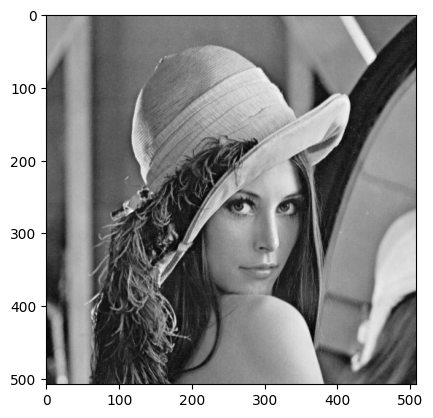

In [217]:
plt.imshow(lena, cmap='gray')

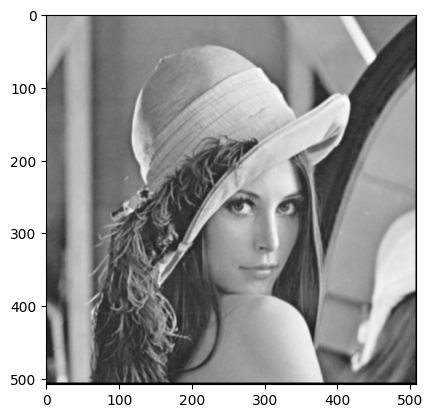

In [218]:
plt.imshow(filtered_lena, cmap='gray')

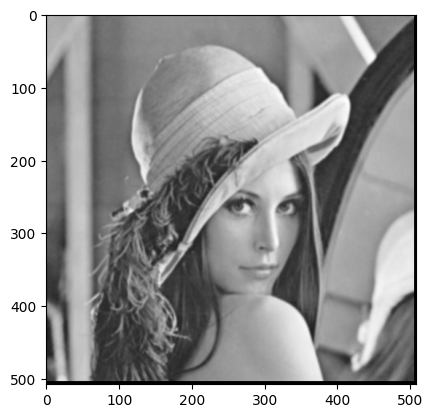

In [219]:
bin5x5 = np.array([[1, 4, 6, 4, 1], [4, 8, 14, 8, 4], [6, 14, 24, 14, 6], [4, 8, 14, 8, 4], [1, 4, 6, 4, 1]]) * 1/256
filtered_lena_5x5 = conv_apply(lena, bin5x5)
plt.imshow(filtered_lena_5x5, cmap='gray')

* Vérifiez que votre fonction fonctionne également avec le filtre passe-bas binomial 5x5.

**Note** : comparez vos résultats avec ceux obtenus avec la fonction scipy.signal.convolve2d.

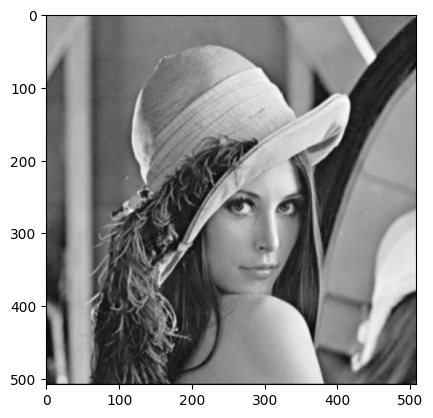

In [220]:
# A vous...
plt.imshow(convolve2d(lena, kernel, mode='same'), cmap='gray')

# Filtre passe-haut et convolution

* Effectuer le même traitement avec les 2 filtres passe-haut.

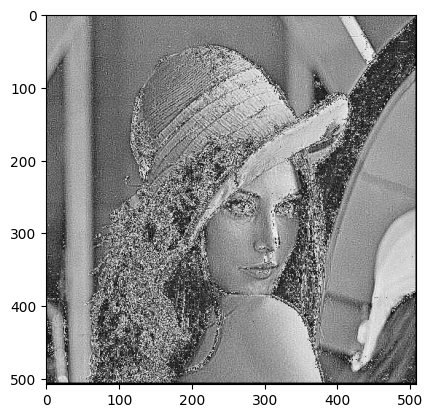

In [221]:
# A vous...
passe_haut_piks = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
plt.imshow(conv_apply(lena, passe_haut_piks), cmap='gray', vmin=0, vmax=255)

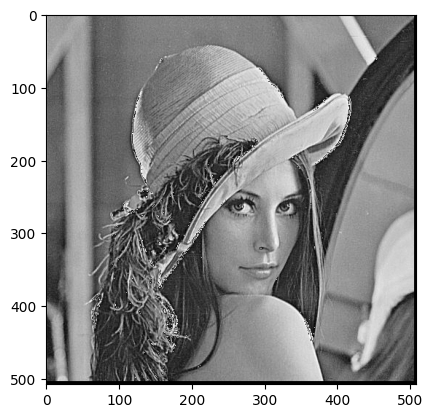

In [222]:
passe_haut_5 = np.array([[-1, -1, -1, -1, -1], [-1, 0, 0, 0, -1], [-1, 0, 32, 0, -1], [-1, 0, 0, 0, -1], [-1, -1, -1, -1, -1]]) * 1/16
plt.imshow(conv_apply(lena, passe_haut_5), cmap='gray')

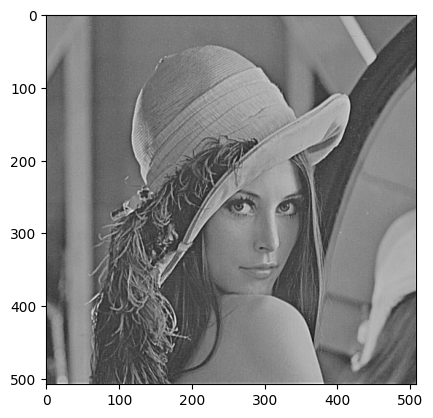

In [223]:
plt.imshow(convolve2d(lena, passe_haut_5, mode='same'), cmap='gray')

* Commentez les résultats, en comparant le filtrage passe-haut et le filtrage passe-bas.



Les filtres passe-hauts ont une impacte beaucoup plus importante que les filtres passe-bas.

# Représentation en fréquence

* Calculer et afficher la représentation fréquentielle de l'image de départ (voir TP2).


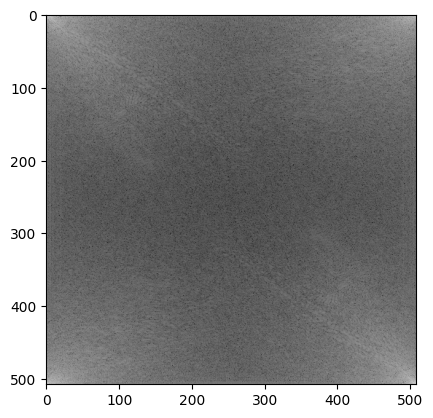

In [224]:
# A vous...
fft2_lena = np.fft.fft2(lena)
plt.imshow(np.log(np.abs(fft2_lena)), cmap='gray')

In [225]:
lena.shape

(508, 509)

In [226]:
filtered_lena_5x5.shape

(508, 509)

* Calculer et afficher la représentation fréquentielle de la même image après convolution avec un filtre passe-bas 5x5.

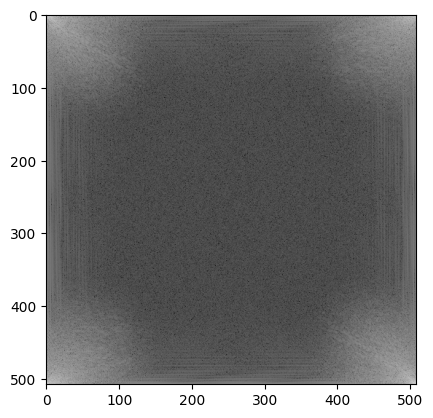

In [227]:
# A vous...
fft2_lena_pb5 = np.fft.fft2(filtered_lena_5x5)
plt.imshow(np.log(np.abs(fft2_lena_pb5)), cmap='gray')

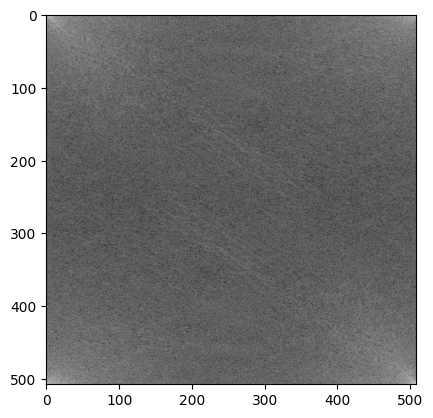

In [243]:
fft2_lena_ph5 = np.fft.fft2(conv_apply(lena, passe_haut_5))
plt.imshow(np.log(np.abs(fft2_lena_ph5)), cmap='gray')

* Vérifier la position des basses fréquences et des hautes fréquences sur la représentation des fréquences.

In [228]:
# A vous...
np.mean(fft2_lena_pb5[0])

(35976.387096774175+3.6594207254046304e-12j)

In [229]:
np.mean(fft2_lena_pb5[250])

(15.94338328826362-4.754796603202285j)

* Écrire une fonction EQM qui calcule l'erreur quadratique moyenne entre 2 images.

In [234]:
# A vous...
def mean_squared_error(img1, img2):
    # img1 = img1.astype(np.float64)
    # img2 = img2.astype(np.float64)
    return np.mean((img1 - img2)**2)

In [246]:
mean_squared_error(lena, filtered_lena_5x5)

482.89375342179915

In [247]:
mean_squared_error(lena, filtered_lena)

312.37023449670824

* Déduire quelles sont les fréquences hautes et basses qui ont le plus d'influence sur l'erreur quadratique moyenne (et donc sur le contenu de l'image).

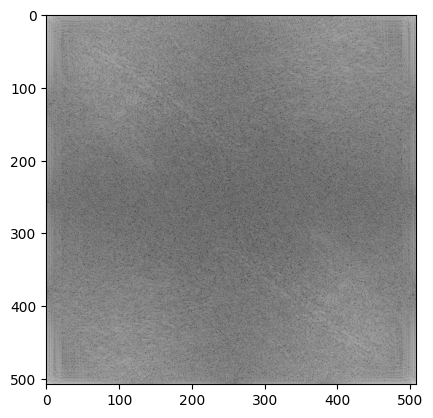

In [236]:
# A vous...
plt.imshow(np.log(np.abs(fft2_lena - fft2_lena_pb5)), cmap='gray')

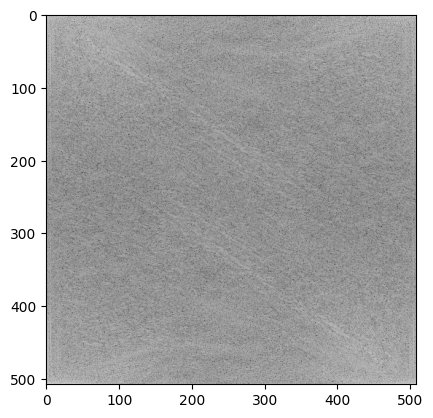

In [244]:
plt.imshow(np.log(np.abs(fft2_lena - fft2_lena_ph5)), cmap='gray')

In [238]:
np.max(np.abs(fft2_lena - fft2_lena_pb5))

2564580.677419357

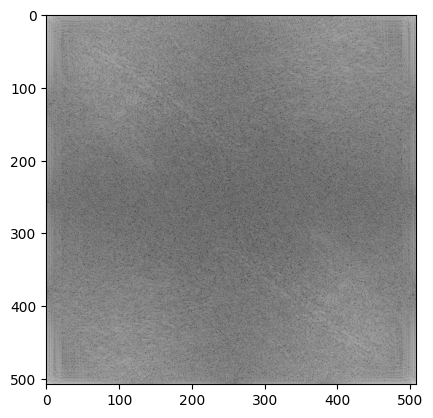

In [241]:
plt.imshow(np.log(np.abs(fft2_lena - fft2_lena_pb5)), cmap='gray')